In [1]:
from requests import post
from app.analysis import Quote
query = 'query UnknownFile($limit_0:[FundLimitOptionInput!]!) {viewer {...Fe}} fragment Fe on Viewer {_screenFunds4s9d1a:screenFunds(filterCategory:["$$"],limit:$limit_0,first:100) {edges {node {symbol}}}}'
variables = {'limit_0':[{'type':'FUND_TOTAL_ASSETS','min':1000000000,'inclusive':True}]}
r = post('https://lens.m1finance.com/graphql', json={'query': query.replace('$$', 'Equities","Foreign'), 'variables': variables}).json()
symbols = [n['node']['symbol'] for n in r['data']['viewer']['_screenFunds4s9d1a']['edges']]
symbols += ['VT']

In [2]:
quote = Quote(symbols, 70, 20)
f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}'

'from 2019-04-26 to 2019-07-05 - 76'

In [4]:
stat = quote.statistics()
stat = stat[(stat['drawdown'] < 8) & (stat['shrp'] > 0.4)]
print(len(stat))
stat

11


,len,mean,std,shrp,drawdown
Symbols,,,,,
RSX,29,6.667911,3.401365,1.913697,4.174395
EWL,29,3.864106,2.244230,1.651067,3.113807
EWA,29,3.294464,1.977738,1.585515,3.100777
EFAV,29,2.241393,1.878006,1.108976,2.819624
VIGI,29,2.502889,3.134952,0.747750,4.587566
FNDE,29,2.875824,4.497807,0.604093,7.045220
EPP,29,2.070127,3.552709,0.538011,4.599415
EFG,29,1.980660,3.413845,0.533689,4.537548
DEM,29,2.372966,4.375788,0.506020,6.447277


Populating the interactive namespace from numpy and matplotlib
evicted RODM 0.990892279512472
evicted EFAV 0.9772271464763638
evicted FNDE 0.9926142888533835
evicted DEM 0.9748074367814429
evicted VIGI 0.9859384801157058
evicted FEZ 0.9931093711043995
evicted EFG 0.9832943453877943
evicted EPP 0.9037760729963312
evicted EWL 0.92275459248016
evicted EWA 0.8329753986490606
{'RSX': 1.0}


,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,29.0,6.667911,3.401365,-0.696386,3.969755,7.845812,9.613616,10.560749,1.913697,4.174395
RSX,29.0,6.667911,3.401365,-0.696386,3.969755,7.845812,9.613616,10.560749,1.913697,4.174395


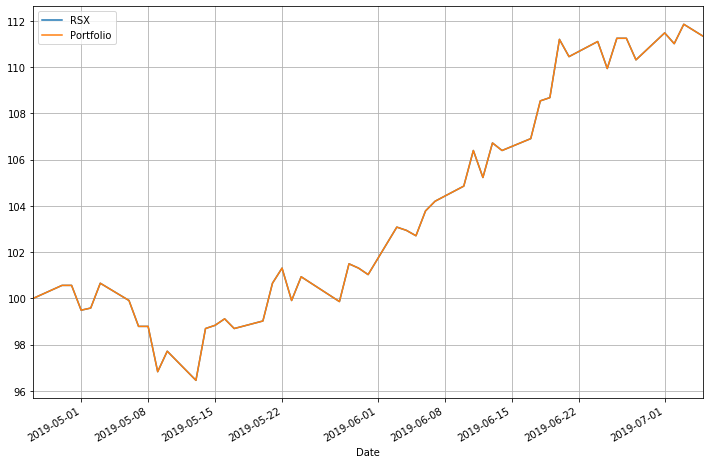

In [5]:
%pylab inline
quote.drop_mask()
ratio = quote.optimize_portfolio(stat.index)
print(ratio)
quote.setup_mask(ratio)
quote.graph(ratio)